In [ ]:
import csv
import math as m
l1 = 50
l2 = 40
with open('datarobot2bac.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','Px','Py'])
  for tt1 in range(-180,180,1):
    for tt2 in range(-180,180,1):
      tt1 = (tt1*m.pi)/180
      tt2 = (tt2*m.pi)/180
      Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2)
      Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2)
      writer.writerow([tt1,tt2,Px,Py])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(20,activation='relu',input_shape=(2,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='Softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                60        
                                                                 
 dense_17 (Dense)            (None, 20)                420       
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dense_19 (Dense)            (None, 2)                 42        
                                                                 
Total params: 942
Trainable params: 942
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
data = pd.read_csv('datarobot2bac.csv')
y = data.drop(data.columns[2:],axis = 1)
x = data.drop(data.columns[:2],axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs=50,verbose=1,validation_data = (x_test, y_test))

Epoch 1/50
760/760 [==============================] - 3s 3ms/step - loss: 1.3654 - accuracy: 0.9829 - val_loss: 1.3608 - val_accuracy: 0.9709
Epoch 2/50
760/760 [==============================] - 2s 2ms/step - loss: 1.3446 - accuracy: 0.9796 - val_loss: 1.3555 - val_accuracy: 0.9780
Epoch 3/50
760/760 [==============================] - 2s 2ms/step - loss: 1.3419 - accuracy: 0.9881 - val_loss: 1.3534 - val_accuracy: 0.9939
Epoch 4/50
760/760 [==============================] - 2s 2ms/step - loss: 1.3410 - accuracy: 0.9914 - val_loss: 1.3530 - val_accuracy: 0.9937
Epoch 5/50
760/760 [==============================] - 2s 2ms/step - loss: 1.3407 - accuracy: 0.9933 - val_loss: 1.3529 - val_accuracy: 0.9969
Epoch 6/50
760/760 [==============================] - 2s 2ms/step - loss: 1.3407 - accuracy: 0.9949 - val_loss: 1.3531 - val_accuracy: 0.9996
Epoch 7/50
760/760 [==============================] - 1s 2ms/step - loss: 1.3407 - accuracy: 0.9957 - val_loss: 1.3530 - val_accuracy: 0.9939
Epoch 

In [ ]:
model.save('robot2bac.h5') 

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

1013/1013 [==============================] - 1s 1ms/step - loss: 1.3522 - accuracy: 0.9971


[1.3521709442138672, 0.9970987439155579]

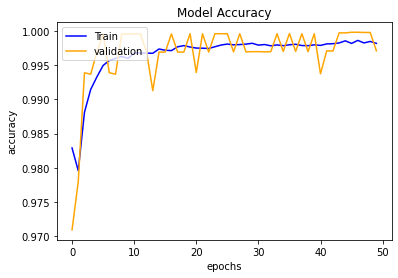

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'], loc = 'upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model_robot2b = load_model('robot2bac.h5')